In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [16]:
info = pd.read_csv("Position_Salaries.csv")
x = info.iloc[:,1:-1].values
y = info.iloc[:,-1:].values

In [17]:
y = y.reshape(len(y), 1)

In [18]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [19]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [20]:
svmr = SVR(kernel='rbf')
svmr.fit(x,y)

/home/jash/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [21]:
sc_y.inverse_transform(svmr.predict(sc_x.transform([[6.5]])).reshape(len(svmr.predict(sc_x.transform([[6.5]]))), 1))

array([[170370.0204065]])

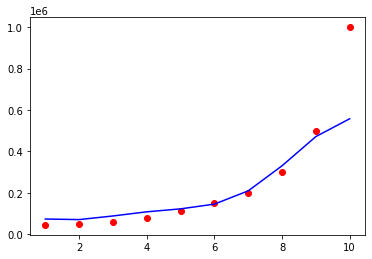

In [32]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(svmr.predict(x).reshape(len(svmr.predict(x)), 1)), color='blue')
plt.show()

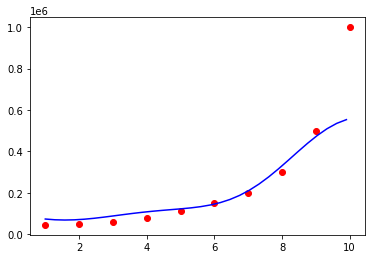

In [36]:
x_gred = np.arange(np.min(x), np.max(x), 0.1)
x_gred = x_gred.reshape(len(x_gred), 1)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x_gred), sc_y.inverse_transform(svmr.predict(x_gred).reshape(len(svmr.predict(x_gred)), 1)), color='blue')
plt.show()